## Seed vs 3'UTR %
A scatter plot with x-axis being the number of seeds in a given species and y-axis being the percent of genes covered in a species

In [1]:
from numpy import loadtxt
import os
import pandas as pd 
from matplotlib import pyplot as plt

In [ ]:
species_list = [
    ('Caenorhabditis elegans (PRJNA13758) genes (WBcel235)','Roundworm (Caenorhabditis elegans)'),
    ('Drosophila melanogaster (Fruit fly) genes (BDGP6.46)','Fruit fly (Drosophila melanogaster)'),
    ('Lamprey genes (Pmarinus_7.0)','Sea Lamprey (Petromyzon marinus)'),
    ('Hagfish genes (Eburgeri_3.2)','Inshore hagfish (Eptatretus burgeri)'),
    ('Elephant shark genes (Callorhinchus_milii-6.1.3)','Australian ghostshark (Callorhinchus milii)'),
    ('Spotted gar genes (LepOcu1)','Spotted gar (Lepisosteus oculatus)'),
    ('Zebrafish genes (GRCz11)','Zebrafish (Danio rerio)'),
    ('Atlantic cod genes (gadMor3.0)','Cod (Gadus morhua)'),
    ('Coelacanth genes (LatCha1)','Coelacanth (Latimeria chalumnae)'),
    ('Tropical clawed frog genes (Xenopus_tropicalis_v9.1)','Tropical clawed frog (Xenopus tropicalis)'),
    ('Tuatara genes (ASM311381v1)','Tuatara (Sphenodon punctatus)'),
    ('Green anole genes (AnoCar2.0v2)','Green anole lizard (Anolis carolinensis)'),
    ('Painted turtle genes (Chrysemys_picta_bellii-3.0.3)','Western painted turtle (Chrysemys picta bellii)'),
    ('Zebra finch genes (bTaeGut1_v1.p)','Zebra finch (Taeniopygia guttata)'),
    ('Chicken (maternal Broiler) genes (bGalGal1.mat.broiler.GRCg7b)','Chicken (Gallus gallus)'),
    ('Platypus genes (mOrnAna1.p.v1)','Platypus (Ornithorhynchus anatinus)'),
    ('Opossum genes (ASM229v1)','Gray short-tailed opossum (Monodelphis domestica)'),
    ('Armadillo genes (Dasnov3.0)','Nine-banded armadillo (Dasypus novemcinctus)'),
    ('Cow genes (ARS-UCD1.2)','Cow (Bos taurus)'),
    ('Dog genes (ROS_Cfam_1.0)','Dog (Canis familiaris)'),
    ('Rabbit genes (OryCun2.0)','Rabbit (Oryctolagus cuniculus)'),
    ('Guinea Pig genes (Cavpor3.0)','Guinea pig (Cavia porcellus)'),
    ('Rat genes (mRatBN7.2)','Norway rat (Rattus norvegicus)'),
    ('Mouse genes (GRCm39)','House mouse (Mus musculus)'),
    ('Human genes (GRCh38.p13)','Human (Homo sapiens)'),
    ('Human TargetScan','Human (Homo sapiens) TargetScan'),
    ('All','All')
]

In [3]:
species_list = [('Octopus bimaculoides (California two-spot octopus, UCB-OBI-ISO-001)','California two-spot octopus (Octopus bimaculoides)')]

In [4]:
def simulate_true_number(genome_filename, mature_filename, v_subset, canon_site):
    #returns real coverage and seed number from mature data
    df = pd.read_csv("Mature Data/"+mature_filename+'.csv')
    
    #filter based on pre_v or post_v
    library = ['Olfactores', 'Chordata', 'Deuterostomia', 'Bilateria', 'Eumetazoa']
    
    if v_subset == 'Pre':
        print("Generating data for Pre_V")
        df = df[df['Node of origin (family)'].isin(library)]
    elif v_subset == 'Post':
        print("Generating data for Post_V")
        df = df[~df['Node of origin (family)'].isin(library)]
    elif v_subset != 'Norm':
        print('ERROR: Invalid v_subset')
        return
        
    filename_data = df['Seed']
    
    #create reverse compliments
    #Replace A with X
    filename_data = [sub.replace('A', 'X') for sub in filename_data]
    
    #Replace T with A
    filename_data = [sub.replace('U', 'A') for sub in filename_data]
    
    #Replace X with T
    filename_data = [sub.replace('X', 'T') for sub in filename_data]
    
    #Replace C with X
    filename_data = [sub.replace('C', 'X') for sub in filename_data]
    
    #Replace G with C
    filename_data = [sub.replace('G', 'C') for sub in filename_data]
    
    #Replace X with G
    filename_data = [sub.replace('X', 'G') for sub in filename_data]
    
    #Reverse all the strings
    filename_data = [sub[::-1] for sub in filename_data]
    
    #If canon site A or C, append A at the end
    if canon_site == 'A':
        filename_data = [item[:-1]+'A' for item in filename_data]
    elif canon_site == 'C':
        filename_data = [item+'A' for item in filename_data]
    
    #remove repeats
    filename_data = [*set(filename_data)]

    if genome_filename == 'All':
        data = []
        for species in species_list:
            if species[0]!='All':
                temp_data = loadtxt("Genome Data/"+species[0]+".txt", comments=">",dtype="str")
                #remove all the Unavailable sequences and sequences that are too short
                allowed_char = 'AGCT'
                temp_data = list(filter(lambda a: all(ch in allowed_char for ch in a) and len(a)>7, temp_data))
                data = data+temp_data
    else:
        data = loadtxt("Genome Data/"+genome_filename+".txt", comments=">",dtype="str")
    
    allowed_char = 'AGCT'
    data = list(filter(lambda a: all(ch in allowed_char for ch in a) and len(a)>7, data))
    data = [*set(data)]
    
    #calculate seed coverage
    covered_list = []
    for gene in data:
        for motif in filename_data:
            if motif in gene:
                covered_list.append(gene)
                break
                    
    #Remove repeats
    covered_list = [*set(covered_list)]
    
    #final data
    seed_number = len(filename_data)
    coverage_number = len(covered_list)
    gene_number = len(data)
        
    print("        "+str(seed_number)+";"+str(coverage_number)+";"+str(gene_number))

In [5]:
sites = ['A','B','C']

for site in sites:
    print("Site: "+site+" Seed "+" Number Covered")
    for species in species_list:
        simulate_true_number(species[0], species[1], 'Norm', site)
#got lazy, copy and paste output into a spreadsheet

Site: A Seed  Number Covered
        139;12442;14985
Site: B Seed  Number Covered
        140;11876;14985
Site: C Seed  Number Covered
        140;9296;14985


In [2]:
def plot_seed_v_3utr(canon_site):
    #load df
    df = pd.read_csv("Seed vs 3'UTR Data (site "+canon_site+" ).csv")
    
    #font
    font = {'family' : 'Arial',
        'weight' : 'normal',
        'size'   : 18}
    plt.rc('font', **font)
    plt.rcParams['svg.fonttype'] = 'none'
    
    #drop target scan and all
    df = df.drop(df[df['Species']=='All'].index)
    df = df.drop(df[df['Species']=='Human (Homo sapiens) TargetScan'].index)
    
    #figure
    fig,ax = plt.subplots(figsize=(15,10))
    fig.patch.set_facecolor('white')
    plt.title("Seed Vs 3'UTR Plot Canon Site "+canon_site)
    plt.xlabel("Seed")
    plt.ylabel("3'UTR")
    
    #scatter plot
    plt.scatter(x=df['Seed Number'], y=df['Genes %'])
    
    #label points 
    plt.rcParams.update({'font.size': 10})
    for idx, row in df.iterrows():
        plt.annotate(row['Species'], (row['Seed Number'], row['Genes %']))
    
    #save fig
    plt.savefig("Seed Vs 3'UTR % Plot (site "+canon_site+").svg", dpi = 120, facecolor=fig.get_facecolor())

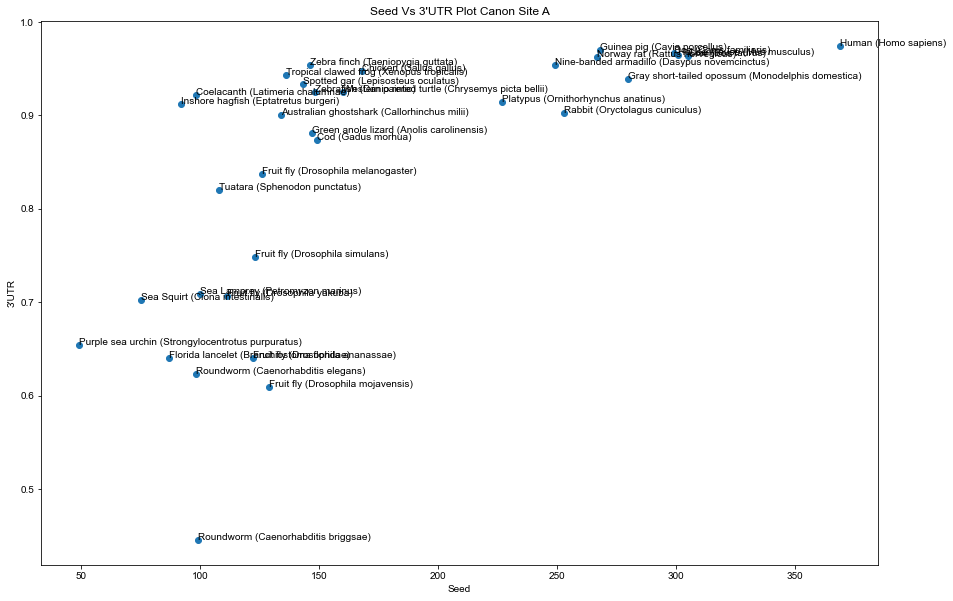

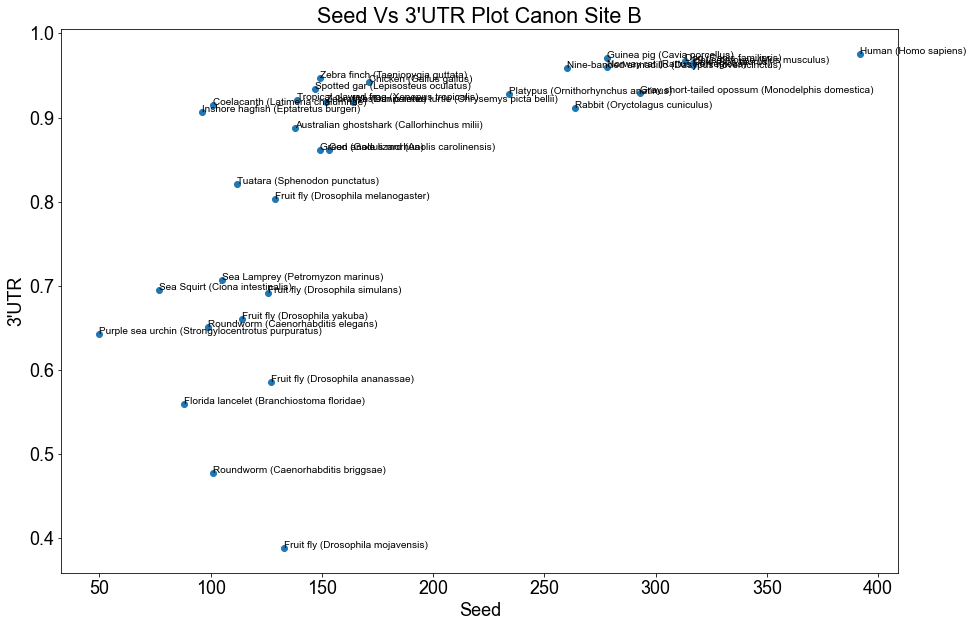

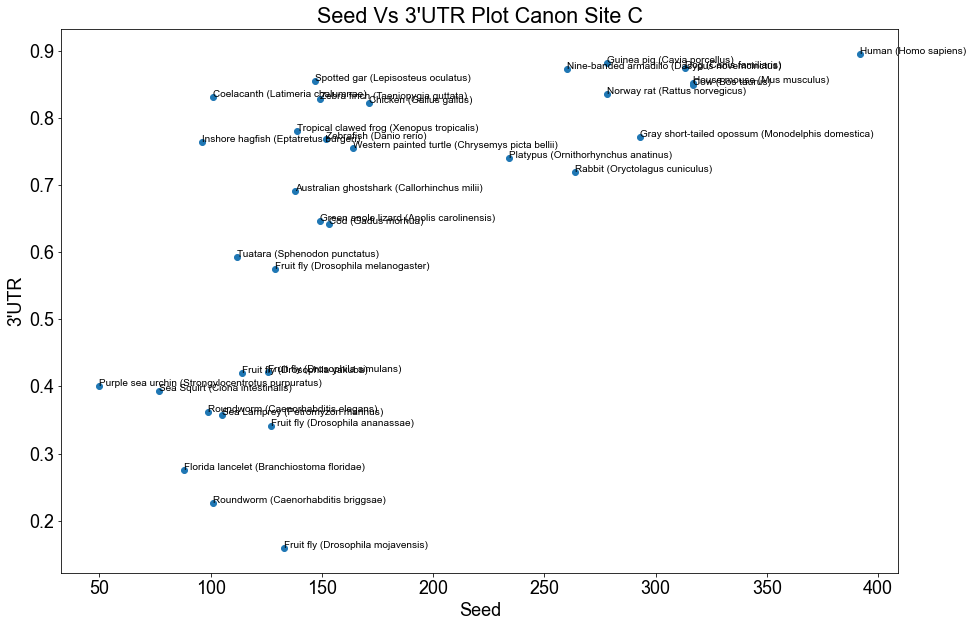

In [3]:
sites = ['A','B','C']
for site in sites:
    plot_seed_v_3utr(site)